# Twitter Data Wrangling
## 1. Data Gathering
### 1.1 Importing necessary libraries¶

In [1]:
import pandas as pd
import numpy as np
import tweepy as tw
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1.2 Importing first data set "Twitter Enhanced Archive" CSV file and creating first DataFrame "archive_df"

In [2]:
#import first data set "Twitter Enhanced Archive" CSV file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

 ### 1.3 Downloading second data set "image prediction data" TSV file and creating second DataFrame "Image_predictions_df"

In [3]:
# Downloading and saving the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Creating our file's name by extracting its name from the url string
file_name = url.split('/')[-1]

#Saving the url's content on the local machine in a TSV file, in the same path of "wrangle_act"
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)
        print("\nThe images predictions file has been successfuly saved as: "+file_name+"\n")
        
#creating DataFrame "Image_predictions_df"
Image_predictions_df=pd.read_csv(file_name, sep='\t')

### 1.4 Quering the additional data from Twitter API using Tweepy, storing it in JSON file and creating third DataFrame 'api_df'

In [4]:
#Defining keys and tokens needed to query Twitter API
consumer_key= '*********************************'
consumer_secret= '******************************'
access_token= '*********************************'
access_token_secret= '**************************'

#Authentication step
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Creating a file for the tweets' text data
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)
                
#Reading the downloaded JSON file by looping on it and storing each line as an element in a list 'tweet_list'         
tweet_list = []
with open ('tweet_json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        tweet_list.append(tweet)
        
#Creating the third dataframe 'api_df' and selecting only three columns from the tweet_list data
api_df=pd.DataFrame(tweet_list,columns=['id','retweet_count','favorite_count'])

In [5]:
#to download the three original DataFrames before cleaning

#archive_df.to_csv (r'C:\Users\mario\Desktop\archive_df.csv', index = False, header=True)
#Image_predictions_df.to_csv (r'C:\Users\mario\Desktop\Image_predictions_df.csv', index = False, header=True)
#api_df.to_csv (r'C:\Users\mario\Desktop\api_df.csv', index = False, header=True)


## 2. Assessment

In [6]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
Image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7403,35121
1,892177421306343426,5512,30391
2,891815181378084864,3638,22850
3,891689557279858688,7581,38401
4,891327558926688256,8159,36660


In [11]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [12]:
#finding the number of dogs classified in more than 1 dog stage
print(len(archive_df.query('doggo == "doggo" & puppo == "puppo"')))
print(len(archive_df.query('doggo == "doggo" & pupper == "pupper"')))
print(len(archive_df.query('doggo == "doggo" & floofer == "floofer"')))

1
12
1


In [13]:
#checking the different values of names entered
print(archive_df['name'].value_counts())

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Enchilada      1
Tripp          1
Napolean       1
Dook           1
Storkson       1
Name: name, Length: 957, dtype: int64


In [14]:
# count of retweets and replies
print(len(archive_df.query('retweeted_status_id != "NaN"')))
print(len(archive_df.query('in_reply_to_status_id != "NaN"')))

181
78


In [15]:
#exploring the stats of numerators and denominators entries
archive_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [16]:
#Checking for images with 3 false predictions
print(len(Image_predictions_df.query('p1_dog == False & p2_dog == False & p3_dog == False')))

324


#### Assessment summary: 

- Quality Issues:

1.  In twitter archive DataFrame, not all dogs are classified (doggo, floofer, pupper, puppo) and some are not mutually exclusive (having more than 1 classification).

2. In twitter archive DataFrame, not all names are correct (some cells are filled with ‘a’ letter only) and many are having ‘None’ in that field.

3. In twitter archive DataFrame, Timestamp’s datatype is ‘object’ while it should be Datetime

4. In twitter archive DataFrame, some entries are either retweets or replies, these entries need to be excluded.

5. In twitter archive DataFrame, there are tweets with no images, missing values in ‘expanded_url’ field. These entries will be dropped

6. In twitter archive DataFrame, some values of ratings are inaccurate, maximum reached was 1776 for 'numerator'and 170 'enominator'

7. In Images Prediction DataFrame, columns can be renamed in a more descriptive manner(ex: first_prediction, etc.).

8. In Tweets Archive DataFrame, the tweets IDs type’s integer.

- Tidiness Isuues:

1. API DataFrame is just 2 additional information for tweets in tweets archive, so they can be merged together.

2. In twitter archive DataFrame, some dogs are being classified with multiple dog stage (doggo, floofer, pupper, puppo), there we can make one column for them all

## 1.3 Data Cleaning

- Create copies of DataFrames to be cleaned

In [ ]:
archive_df2 = archive_df.copy()
Image_predictions_df2 = Image_predictions_df.copy()
api_df2 = api_df.copy()

- Define:
Remove Retweets and Replies

In [17]:
#creating 2 DataFrames of the retweets and replies only
retweets = archive_df[archive_df['retweeted_status_id'].notnull()]
replies  = archive_df[archive_df['in_reply_to_status_id'].notnull()]


#creating a list of the tweets IDs of these entries and merging them into 1 list "blacklist"
list1 = retweets["tweet_id"].tolist()
list2 = replies["tweet_id"].tolist()
blacklist = list1 + list2

#creating a new tweets archive DataFrame excluding these tweets based on the blacklist we made
archive_df2 = archive_df[~archive_df['tweet_id'].isin(blacklist)]
archive_df2.reset_index(inplace= True,drop=True)

#drop the columns that are not necessary now
droplist = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
for series in droplist:
    if series in archive_df2:
        archive_df2.drop(columns=[series],inplace=True)


#doing the same for Image predictions DataFrame and API DataFrame
Image_predictions_df2 = Image_predictions_df[~Image_predictions_df['tweet_id'].isin(blacklist)]
Image_predictions_df2.reset_index(inplace= True,drop=True)

api_df2 = api_df[~api_df['id'].isin(blacklist)]
api_df2.reset_index(inplace= True, drop=True)

- Test

In [18]:
archive_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


In [19]:
Image_predictions_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.5+ KB


In [20]:
api_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2090 non-null   int64
 1   retweet_count   2090 non-null   int64
 2   favorite_count  2090 non-null   int64
dtypes: int64(3)
memory usage: 49.1 KB


-------------------------------------------------------------------------------------------

- Define: Remove tweets without images from Archive and API DataFrames, and drop empty 'expanded urls' entries

In [21]:
#extracting the tweets IDs that have an image, and dropping tweets without images from Archive and API DataFrames 
tweets_with_images = Image_predictions_df2['tweet_id'].tolist()

archive_df2 = archive_df2[archive_df2['tweet_id'].isin(tweets_with_images)]
archive_df2 = archive_df2.dropna(subset=['expanded_urls'])
archive_df2.reset_index(drop= True,inplace=True)

api_df2= api_df2[api_df2['id'].isin(tweets_with_images)]
api_df2.reset_index(drop= True,inplace=True)

- Test:

In [22]:
archive_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 184.9+ KB


In [23]:
api_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              1964 non-null   int64
 1   retweet_count   1964 non-null   int64
 2   favorite_count  1964 non-null   int64
dtypes: int64(3)
memory usage: 46.2 KB


------------------------------------------------------------------------------

- Define: merge the 4 dogs stages columns into 1 column

In [24]:
#replacing 'None' values with empty values in the 4 stages columns
archive_df3 = archive_df2.copy()
archive_df3.iloc[:, -4:  ] = archive_df3.iloc[:, -4:  ].replace('None','')

#concat the content of the 4 columns into 1 new column 'dog_stage'
archive_df3['dog_stage'] = archive_df3['doggo'] +archive_df3['floofer']+archive_df3['pupper']+ archive_df3['puppo'] 
archive_df3.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

#adding '-' to separate between stages
archive_df3.loc[archive_df3.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_df3.loc[archive_df3.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'
archive_df3.loc[archive_df3.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'

archive_df3.dog_stage =archive_df3.dog_stage.replace('' ,np.nan)


 - Test:

In [25]:
print(len(archive_df3.query('dog_stage == "doggo-pupper"')))

8


------------------------------------------------------------------------------------------------

 - Define: Converting 'Timestamp' type from object to datetime

In [26]:
archive_df3["timestamp"] = pd.to_datetime(archive_df2["timestamp"])

- Test

In [27]:
archive_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           303 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 138.7+ KB


----------------------------------------------------------------

- Define: Removing the invalid dogs' names entries (such as 'a' , etc..)

In [28]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_df3.iterrows():  
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df3.loc[index,'name'] = archive_df3.loc[index,'name'].replace(row['name'], c_name)

        except IndexError:
            archive_df3.loc[index,'name'] = np.nan

            
archive_df3.name.value_counts(dropna = False)

NaN         592
Charlie      11
Oliver       10
Cooper       10
Lucy         10
           ... 
Poppy         1
Ashleigh      1
Rolf          1
Bronte        1
Carbon        1
Name: name, Length: 937, dtype: int64

 - Test

In [29]:
a = archive_df3['name'].unique()
print(a)

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' nan 'Jax' 'Zoey' 'Cassie'
 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus' 'Gerald'
 'Jeffrey' 'Canela' 'Maya' 'Mingus' 'Derek' 'Roscoe' 'Waffles' 'Jimbo'
 'Maisey' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah' 'Bella' 'Grizzwald' 'Rusty'
 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary' 'Elliot' 'Louis' 'Jesse'
 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Steven' 'Beau' 'Snoopy' 'Shadow'
 'Emmy' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger' 'Benedict' 'Venti' 'Goose'
 'Nugget' 'Cash' 'Jed' 'Sebastian' 'Sierra' 'Monkey' 'Harry' 'Kody'
 'Lassie' 'Rover' 'Napolean' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'Dewey'
 'Scout' 'Gizmo' 'Walter' 'Cooper' 'Harold' 'Shikha' 'Lili' 'Jamesy'
 'Coco' 'Sammy' 'Meatball' 'Paisley' 'Albus' 'Neptune' 'Belle' 'Quinn'
 'Zooey' 'Dave' 'Jersey' 'Hobbes' 'Burt' 'Lorenzo' 'Carl' 'Jordy' 'Milky'
 'Trooper' 'Sophie' 'Wyatt' 'Rosie' 'Thor' 'Oscar' 'Callie' 'Cermet'
 'Marlee' 'Arya' 'Einstein' 'Alice' 'Rumpole' 'Benny' 'Aspen' 'Jarod'
 'Wi

----------------------------------------------------------------

- Define: Renaming Image predictions DataFrame headers 

In [30]:
Image_predictions_df2.rename(columns={'p1': 'first_prediction',
                                      'p2': 'second_prediction',
                                      'p3': 'third_prediction',
                                      'p1_conf': 'first_prediction_confidence',
                                      'p2_conf': 'second_prediction_confidence',
                                      'p3_conf': 'third_prediction_confidence',
                                      'p1_dog':'first_prediction_result',
                                      'p2_dog':'second_prediction_result',
                                      'p3_dog':'third_prediction_result'}, inplace=True)

In [31]:
Image_predictions_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      1971 non-null   int64  
 1   jpg_url                       1971 non-null   object 
 2   img_num                       1971 non-null   int64  
 3   first_prediction              1971 non-null   object 
 4   first_prediction_confidence   1971 non-null   float64
 5   first_prediction_result       1971 non-null   bool   
 6   second_prediction             1971 non-null   object 
 7   second_prediction_confidence  1971 non-null   float64
 8   second_prediction_result      1971 non-null   bool   
 9   third_prediction              1971 non-null   object 
 10  third_prediction_confidence   1971 non-null   float64
 11  third_prediction_result       1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.

- Test

In [32]:

x = Image_predictions_df2['second_prediction'].value_counts()
print(x)

Labrador_retriever          95
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
                            ..
wallet                       1
bathing_cap                  1
monitor                      1
chimpanzee                   1
tray                         1
Name: second_prediction, Length: 397, dtype: int64


-------------------------------------------------

- Define: Convert all predictions to lowercase

In [33]:
Image_predictions_df2['first_prediction'] = Image_predictions_df2['first_prediction'].str.title()
Image_predictions_df2['second_prediction'] = Image_predictions_df2['second_prediction'].str.title()
Image_predictions_df2['third_prediction'] = Image_predictions_df2['third_prediction'].str.title()

- Test

In [34]:
x = Image_predictions_df2['second_prediction'].value_counts()
print(x)

Labrador_Retriever          95
Golden_Retriever            82
Cardigan                    73
Chihuahua                   43
Chesapeake_Bay_Retriever    40
                            ..
Stingray                     1
Cowboy_Boot                  1
Minibus                      1
Snorkel                      1
Snail                        1
Name: second_prediction, Length: 396, dtype: int64


------------------------------------------------------

- Define: Setting all Denominators values to 10

In [35]:
archive_df3['denominator'] = '10'

 - Test

In [36]:
archive_df3['denominator'].value_counts()

10    1971
Name: denominator, dtype: int64

--------------------------

- Define: Replacing the strange outlying numerator values by '10'

In [37]:
archive_df3['rating_numerator'].replace({ 1776:10,420:10,204:10,144:10,88:10,165:10 
                                         ,50:10,99:10,80:10,45:10,60:10,44:10
                                         ,121:10,26:10,84:10,24:10,75:10,27:10}, inplace=True)

 -Test

In [38]:
archive_df3['rating_numerator'].unique()


array([13, 12, 14,  5, 11,  6, 10,  0,  3,  7,  8,  9,  4,  2,  1],
      dtype=int64)

------------------------------------------------------------

- Define: Merging API and Archive DataFrames

In [39]:
from functools import reduce

#Renaming the id column to match other DataFrames 'tweet_id' instead of 'id'
api_df2.rename(columns = {'id': 'tweet_id'}, inplace = True)

data_frames = [archive_df3, api_df2]

# if you want to fill the values that don't exist in the lines of merged dataframe simply fill with required strings as
clean_tweets_df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],how='outer'), data_frames)

- Test

In [40]:
clean_tweets_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,denominator,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,10,7403.0,35121.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,10,5512.0,30391.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,10,3638.0,22850.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,10,7581.0,38401.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,10,8159.0,36660.0


-------------------------------------------

- Create master_df :

In [41]:
from functools import reduce

data_frames = [archive_df3, api_df2, Image_predictions_df2]

# if you want to fill the values that don't exist in the lines of merged dataframe simply fill with required strings as
master_df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],how='outer'), data_frames)

- Test:

In [42]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,denominator,...,img_num,first_prediction,first_prediction_confidence,first_prediction_result,second_prediction,second_prediction_confidence,second_prediction_result,third_prediction,third_prediction_confidence,third_prediction_result
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,10,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,10,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,10,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,10,...,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,10,...,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


In [43]:
#export the cleaned DataFrames as CSV files

archive_df3.to_csv (r'C:\Users\mario\Desktop\archive_df3.csv', index = False, header=True)
Image_predictions_df2.to_csv (r'C:\Users\mario\Desktop\Image_predictions_df2.csv', index = False, header=True)
api_df2.to_csv (r'C:\Users\mario\Desktop\api_df2.csv', index = False, header=True)
clean_tweets_df.to_csv (r'C:\Users\mario\Desktop\clean_tweets_df.csv', index = False, header=True)
master_df.to_csv (r'C:\Users\mario\Desktop\master_df.csv', index = False, header=True)

-------------------------------------------------

## Data Visualization

In [44]:
viz_df = master_df
viz_df['month_year'] = pd.to_datetime(viz_df['timestamp']).dt.to_period('M')
viz_df['month'] = viz_df['timestamp'].dt.month
viz_df['year'] = viz_df['timestamp'].dt.year

### 1. Visualization for average ratings for dogs and interactions over time

In [45]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(15,6)})

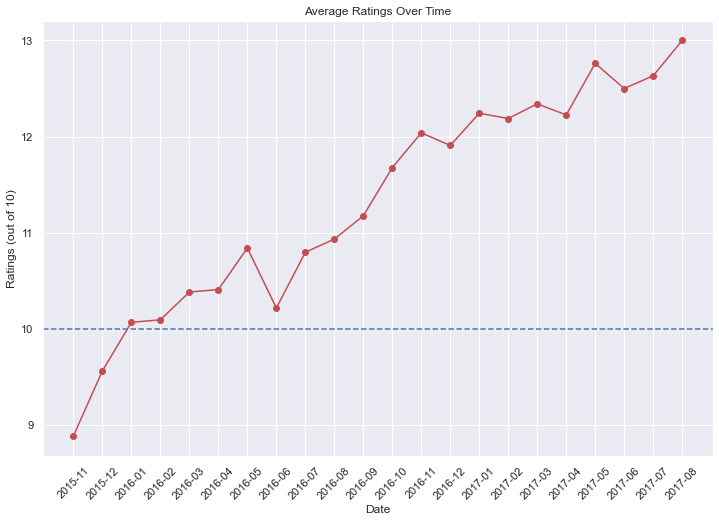

In [46]:
df_t = master_df.copy()
c = df_t.groupby(['year', 'month']).mean()['rating_numerator']
a = df_t['month_year'].unique()
a=a[::-1]
width = 0.35
ind = np.arange(len(c))  # the x locations for the groups
df_t.index = df_t['timestamp']
df_t.sort_index(inplace=True)
data_to_plot = df_t.groupby([(df_t.index.year),(df_t.index.month)]).rating_numerator.mean()
data_to_plot.plot(style='-ro', figsize=(12,8),label='Total average rating')
plt.ylabel('Ratings (out of 10)')
plt.xlabel('Date')
plt.title('Average Ratings Over Time')
locations = ind  # xtick locations
labels = a # xtick labels
plt.xticks(locations, labels,rotation='45')
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')

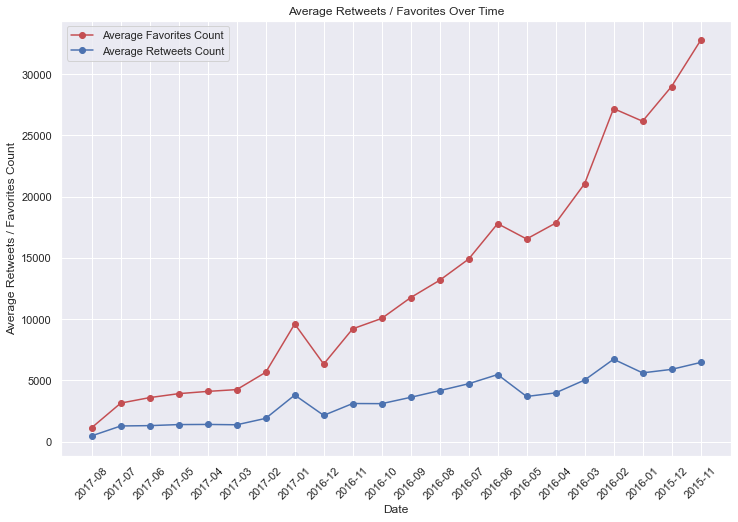

In [47]:

avg_fav = df_t.groupby(['year', 'month']).mean()['favorite_count']
avg_ret = df_t.groupby(['year', 'month']).mean()['retweet_count']
a = df_t['month_year'].unique()
a=a[::-1]
width = 0.35
ind = np.arange(len(avg_ret))  # the x locations for the groups
df_t.index = df_t['timestamp']
df_t.sort_index(inplace=True)

data_to_plot1 = df_t.groupby([(df_t.index.year),(df_t.index.month)]).favorite_count.mean()
data_to_plot1.plot(style='-ro', figsize=(12,8),label='Average Favorites Count')

data_to_plot2 = df_t.groupby([(df_t.index.year),(df_t.index.month)]).retweet_count.mean()
data_to_plot2.plot(style='-bo', figsize=(12,8),label='Average Retweets Count')

plt.ylabel('Average Retweets / Favorites Count')
plt.xlabel('Date')
plt.title('Average Retweets / Favorites Over Time')
locations = ind  # xtick locations
labels = a # xtick labels
plt.xticks(locations, labels,rotation='45')
plt.legend()

----------------------------------------

### 2. Visualization for ratings of different dogs stages

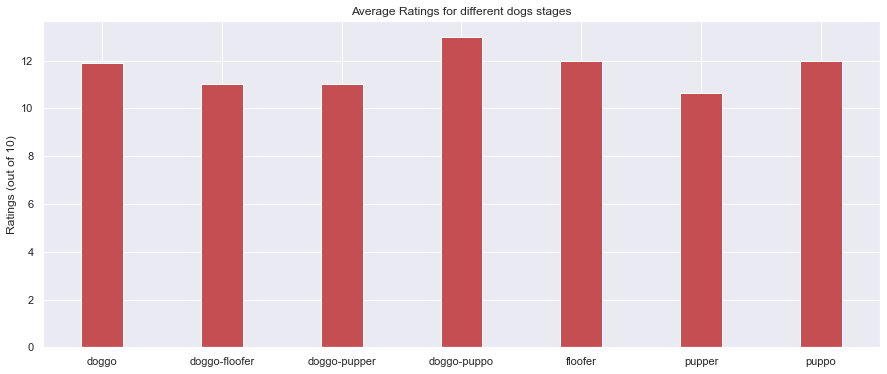

In [48]:
a = df_t['dog_stage'].value_counts()
ind = np.arange(len(a))
df_t.index = df_t['dog_stage']
df_t.sort_index(inplace=True)
width = 0.35
data_to_plot = df_t.groupby([(df_t.dog_stage)]).rating_numerator.mean()
graph = plt.bar(ind , data_to_plot, width, color='r')
plt.ylabel('Ratings (out of 10)')
plt.title('Average Ratings for different dogs stages')

df_t.index = df_t['dog_stage']
labels = df_t['dog_stage'].dropna().unique()
locations = ind 
plt.xticks(locations, labels,rotation='horizontal')
plt.show()

-------------------------------------------------------

### 2. Visualization for interactions with different dogs breeds

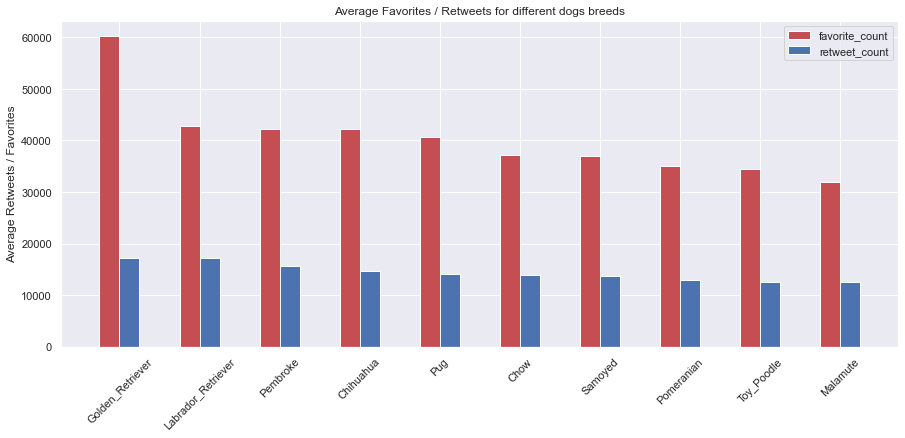

In [49]:
breed = df_t['first_prediction'].value_counts().nlargest(10).index.tolist()
ind = np.arange(len(breed))
df_t.index = df_t['first_prediction']
df_t.sort_index(inplace=True)
width = 0.25
data_to_plot1 = df_t.groupby([(df_t.first_prediction)]).favorite_count.mean().nlargest(10)
data_to_plot2 = df_t.groupby([(df_t.first_prediction)]).retweet_count.mean().nlargest(10)

graph1 = plt.bar(ind , data_to_plot1, width, color='r',label='favorite_count')
graph2 = plt.bar(ind+width , data_to_plot2, width, color='b', label = 'retweet_count')
plt.ylabel('Average Retweets / Favorites')
plt.title('Average Favorites / Retweets for different dogs breeds')

df_t.index = df_t['first_prediction']
labels = breed
locations = ind +width/2
plt.xticks(locations, labels,rotation='45')
plt.legend()
plt.show()

-------------------------------------------------------